In [2]:
import pandas as pd  # pandas library for dataframe
import numpy as np   # numpy library for number
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.impute import SimpleImputer


In [3]:
original_df = pd.read_csv("Online Retail Data Set.csv",encoding="latin1")

In [4]:
raw_df = original_df.copy()

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541692 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   415334 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
raw_df.duplicated().sum()

5268

In [7]:
raw_df.shape

(541909, 8)

In [20]:
541909-5268

536641

In [9]:
raw_df.duplicated().sum() / raw_df.shape[0]*100

0.9721189350979592

In [10]:
raw_df.drop_duplicates(inplace=True)

In [11]:
# Remove rows with missing descriptions
raw_df = raw_df[raw_df["Description"] != "?"]

# Separate 'SAMPLES' records and remove them from the main dataframe
samples_df = raw_df[raw_df["Description"] == "SAMPLES"]
raw_df = raw_df[raw_df["Description"] != "SAMPLES"]

# Separate 'Manual' adjustments and remove them from the main dataframe
Manual_adjustments = raw_df[raw_df["Description"] == "Manual"]
raw_df = raw_df[raw_df["Description"] != "Manual"]

# Separate transport-related rows and remove them from the main dataframe
Transport = raw_df[raw_df["Description"].isin(["DOTCOM POSTAGE", "POSTAGE", "CARRIAGE", "Next Day Carriage"])]
raw_df = raw_df[~raw_df["Description"].isin(["DOTCOM POSTAGE", "POSTAGE", "CARRIAGE", "Next Day Carriage"])]

# Separate bank and adjustment-related charges and remove them from the main dataframe
Charges = raw_df[raw_df["Description"].isin(["Adjust bad debt", "Bank Charges", "AMAZON FEE"])]
raw_df = raw_df[~raw_df["Description"].isin(["Adjust bad debt", "Bank Charges", "AMAZON FEE"])]

# Separate 'CRUK Commission' and remove it from the main dataframe
CRUK_Commission = raw_df[raw_df["Description"] == "CRUK Commission"]
raw_df = raw_df[raw_df["Description"] != "CRUK Commission"]

# Separate rows where UnitPrice is 0 and remove them from the main dataframe
Unit_price_0 = raw_df[raw_df["UnitPrice"] == 0]
raw_df = raw_df[raw_df["UnitPrice"] != 0]

# Remove rows with StockCode 'D' and separate 'Discount' rows
Discount = raw_df[raw_df["StockCode"] == "D"]
raw_df = raw_df[raw_df["StockCode"] != "D"]

# Remove rows with negative or zero Quantity (returns) and keep the return products separately
Return_products = raw_df[raw_df["Quantity"] < 0]
raw_df = raw_df[raw_df["Quantity"] > 0]


In [13]:
raw_df.shape[0]

522492

In [21]:
# Here the noumber of the rows which are transfered to the other data is 14149
# And the number of rows which are remaining after dropping the duplicated values are 536641

print(f"The % rows which are transfered or removed from the original data: {14149 * 100 / 536641}")

The % rows which are transfered or removed from the original data: 2.63658572490734


In [8]:
raw_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     123214
Country             0
dtype: int64

In [23]:
raw_df[raw_df["Country"] == "United Kingdom"]["CustomerID"].isnull().sum()

121826

In [24]:
#to check the percentage of the null values in the customer id col
((raw_df[raw_df["Country"] == "United Kingdom"]["CustomerID"].isnull().sum())/raw_df.shape[0]) * 100

23.316337857804523

In [25]:
raw_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     123214
Country             0
dtype: int64

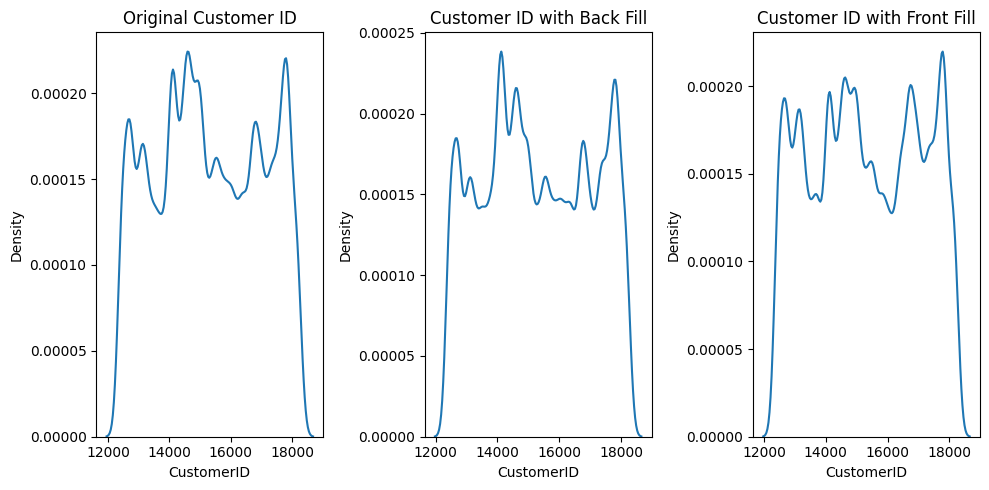

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.kdeplot(raw_df["CustomerID"])
plt.title("Original Customer ID")

plt.subplot(1,3,2)
sns.kdeplot(raw_df["CustomerID"].fillna(method = "bfill"))
plt.title("Customer ID with Back Fill")

plt.subplot(1,3,3)
sns.kdeplot(raw_df["CustomerID"].fillna(method = "ffill"))
plt.title("Customer ID with Front Fill")
plt.tight_layout()

In [27]:
raw_df.nunique()

InvoiceNo      19773
StockCode       3912
Description     4017
Quantity         374
InvoiceDate    18332
UnitPrice        499
CustomerID      4334
Country           38
dtype: int64

In [28]:
raw_df.describe()

,Quantity,UnitPrice,CustomerID
count,522492.000000,522492.000000,399278.000000
mean,10.643878,3.273247,15298.418365
std,156.601288,4.393903,1709.782341
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,4.000000,2.080000,15159.000000
75%,12.000000,4.130000,16807.000000
max,80995.000000,649.500000,18287.000000


In [30]:
raw_df["Country"].value_counts()

Country
United Kingdom          478826
Germany                   8643
France                    8085
EIRE                      7768
Spain                     2417
Netherlands               2322
Belgium                   1935
Switzerland               1927
Portugal                  1455
Australia                 1180
Norway                    1048
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Unspecified                442
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     292
Hong Kong                  275
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57


In [31]:
raw_df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
223792,556491,21363,HOME SMALL WOOD LETTERS,1,12-06-2011 14:15,4.95,16794.0,United Kingdom


In [32]:
uk_mask = raw_df[raw_df["Country"] == "United Kingdom"]
uk_mask['CustomerID'] = uk_mask['CustomerID'].fillna(method='ffill')
raw_df.loc[uk_mask.index, 'CustomerID'] = uk_mask['CustomerID']

C:\Users\Alok\AppData\Local\Temp\ipykernel_3232\1538881863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_mask['CustomerID'] = uk_mask['CustomerID'].fillna(method='ffill')


In [33]:
rest_mask = raw_df[raw_df["Country"] != "United Kingdom"]
rest_mask['CustomerID'] = rest_mask['CustomerID'].fillna(method='ffill')
raw_df.loc[rest_mask.index, 'CustomerID'] = rest_mask['CustomerID']

C:\Users\Alok\AppData\Local\Temp\ipykernel_3232\1323955997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_mask['CustomerID'] = rest_mask['CustomerID'].fillna(method='ffill')


<Axes: xlabel='CustomerID', ylabel='Density'>

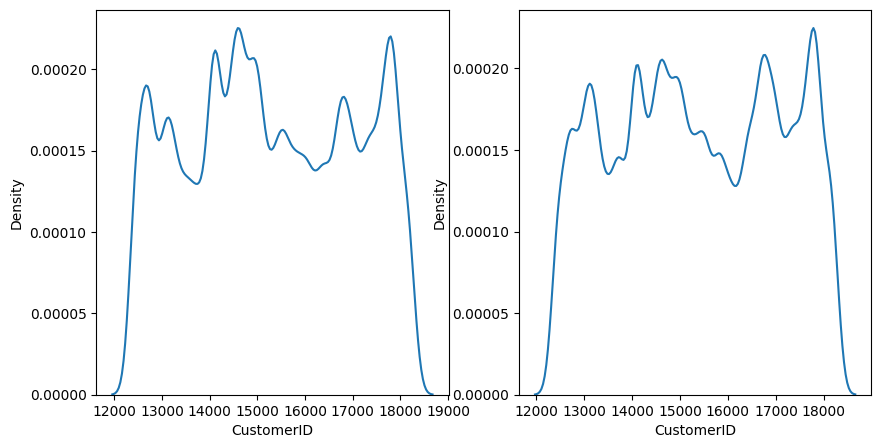

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(original_df["CustomerID"])

plt.subplot(1,2,2)
sns.kdeplot(raw_df["CustomerID"])

In [35]:
raw_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522492 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522492 non-null  object 
 1   StockCode    522492 non-null  object 
 2   Description  522492 non-null  object 
 3   Quantity     522492 non-null  int64  
 4   InvoiceDate  522492 non-null  object 
 5   UnitPrice    522492 non-null  float64
 6   CustomerID   522492 non-null  float64
 7   Country      522492 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 52.0+ MB


In [22]:

raw_df.sample(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
406279,571746,23133,LARGE IVORY HEART WALL ORGANISER,2,19-10-2011 10:56,8.25,17043.0,United Kingdom


In [23]:
# raw_df.to_csv("imputed_df.csv",index=False)

In [37]:
imputed_df = pd.read_csv("imputed_df.csv",encoding="latin1")

In [38]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522492 entries, 0 to 522491
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522492 non-null  int64  
 1   StockCode    522492 non-null  object 
 2   Description  522492 non-null  object 
 3   Quantity     522492 non-null  int64  
 4   InvoiceDate  522492 non-null  object 
 5   UnitPrice    522492 non-null  float64
 6   CustomerID   522492 non-null  float64
 7   Country      522492 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.9+ MB


In [26]:
imputed_df["Quantity"] = imputed_df["Quantity"].astype("int32")
imputed_df["UnitPrice"] = imputed_df["UnitPrice"].astype("float32")
imputed_df["CustomerID"] = imputed_df["CustomerID"].astype("int16")

In [27]:
imputed_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,522492.000000,522492.000000,522492.000000,522492.000000
mean,559960.589221,10.643878,3.273247,15362.162506
std,13420.821461,156.601288,4.393903,1705.928914
min,536365.000000,1.000000,0.001000,12346.000000
25%,547906.000000,1.000000,1.250000,13984.000000
50%,560688.000000,4.000000,2.080000,15297.000000
75%,571797.000000,12.000000,4.130000,16877.000000
max,581587.000000,80995.000000,649.500000,18287.000000


In [39]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522492 entries, 0 to 522491
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522492 non-null  int64  
 1   StockCode    522492 non-null  object 
 2   Description  522492 non-null  object 
 3   Quantity     522492 non-null  int64  
 4   InvoiceDate  522492 non-null  object 
 5   UnitPrice    522492 non-null  float64
 6   CustomerID   522492 non-null  float64
 7   Country      522492 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.9+ MB


In [40]:
imputed_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [41]:
UK_sales = imputed_df[imputed_df["Country"] == "United Kingdom"]
Rest_country_sales = imputed_df[imputed_df["Country"] != "United Kingdom"]

In [42]:
UK_sales["Quantity"].value_counts()

Quantity
1        141051
2         77741
12        50201
3         35035
6         34946
          ...  
828           1
512           1
1400          1
291           1
80995         1
Name: count, Length: 368, dtype: int64

In [55]:
def calculate_iqr(series):
    # Calculate Q1 and Q3
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate upper and lower fences
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    # Print the fences
    print("Upper Fence =", upper_fence)
    print("Lower Fence =", lower_fence)

In [56]:
UK_sales.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
315453,565648,23436,VINTAGE CHRISTMAS GIFT BAG LARGE,3,05-09-2011 16:22,1.25,18196.0,United Kingdom


In [57]:
UK_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478826 entries, 0 to 522476
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    478826 non-null  int64  
 1   StockCode    478826 non-null  object 
 2   Description  478826 non-null  object 
 3   Quantity     478826 non-null  int64  
 4   InvoiceDate  478826 non-null  object 
 5   UnitPrice    478826 non-null  float64
 6   CustomerID   478826 non-null  float64
 7   Country      478826 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 32.9+ MB


In [58]:
calculate_iqr(UK_sales["Quantity"])

Upper Fence = 23.5
Lower Fence = -12.5


In [59]:
UK_sales["Quantity"].describe()

count    478826.000000
mean          9.688421
std         162.912221
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

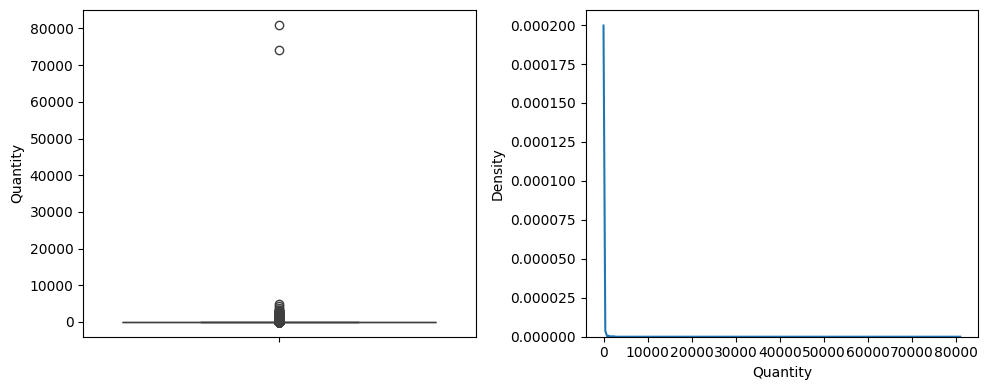

In [60]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(UK_sales["Quantity"])

plt.subplot(1,2,2)
sns.kdeplot(UK_sales["Quantity"])

plt.tight_layout()


In [61]:
UK_sales["Quantity"].skew()

454.3459350864091

In [62]:
calculate_iqr(UK_sales["Quantity"])

Upper Fence = 23.5
Lower Fence = -12.5


In [63]:
UK_sales["Quantity_log"] = np.log1p(UK_sales["Quantity"])
UK_sales["Quantity_log"].skew()

C:\Users\Alok\AppData\Local\Temp\ipykernel_3232\3666331187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_sales["Quantity_log"] = np.log1p(UK_sales["Quantity"])


1.0829452101580714

<Axes: xlabel='Quantity_log', ylabel='Count'>

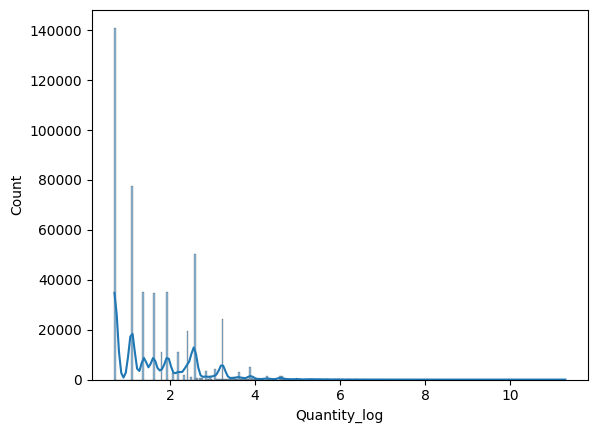

In [64]:
sns.histplot(UK_sales["Quantity_log"], kde=True)

In [65]:
calculate_iqr(UK_sales["Quantity_log"])

Upper Fence = 4.955017411156009
Lower Fence = -1.8639749577976925


<Axes: xlabel='Quantity_log', ylabel='Count'>

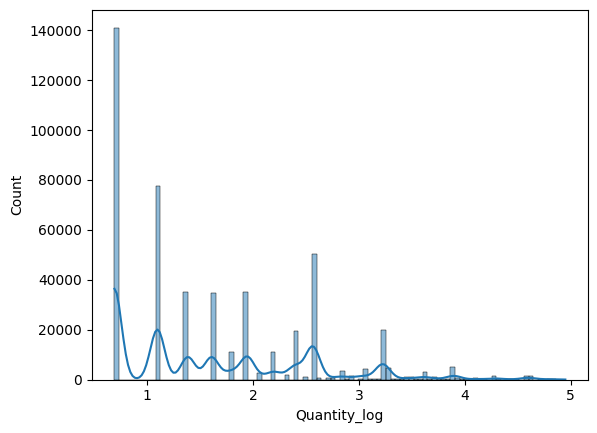

In [66]:
sns.histplot(UK_sales["Quantity_log"][UK_sales["Quantity_log"]<4.95], kde=True)

In [67]:
UK_sales.count()

InvoiceNo       478826
StockCode       478826
Description     478826
Quantity        478826
InvoiceDate     478826
UnitPrice       478826
CustomerID      478826
Country         478826
Quantity_log    478826
dtype: int64

In [44]:
quantity_outliers = UK_sales[UK_sales["Quantity_log"]> 4.955] 
UK_sales = UK_sales[UK_sales["Quantity_log"]< 4.955] 

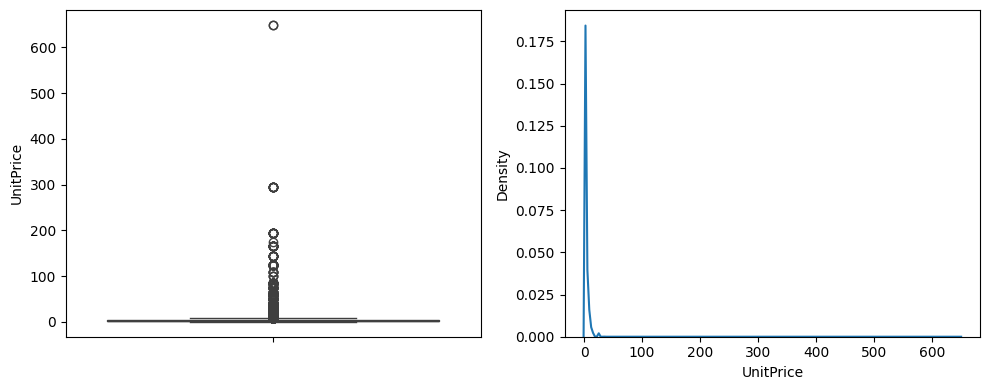

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(UK_sales["UnitPrice"])

plt.subplot(1,2,2)
sns.kdeplot(UK_sales["UnitPrice"])

plt.tight_layout()


In [46]:
UK_sales["UnitPrice"].skew()

26.399843

In [47]:
calculate_iqr(UK_sales["UnitPrice"])

Upper Fence = 8.450000286102295
Lower Fence = -3.070000171661377


(-3.070000171661377, 8.450000286102295)

In [48]:
UK_sales["UnitPrice_log"] = np.log1p(UK_sales["UnitPrice"])
UK_sales["UnitPrice_log"].skew()

0.69375813

<Axes: xlabel='UnitPrice_log', ylabel='Count'>

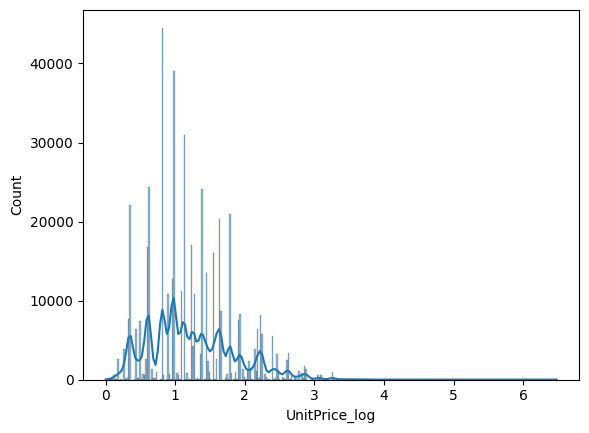

In [49]:
sns.histplot(UK_sales["UnitPrice_log"],kde=True)

In [50]:
calculate_iqr(UK_sales["UnitPrice_log"][UK_sales["UnitPrice_log"]<2.87])

Upper Fence = 2.871369034051895
Lower Fence = -0.4253331124782562


(-0.4253331124782562, 2.871369034051895)

In [51]:
UnitPrice_outliers = UK_sales[UK_sales["UnitPrice_log"]>2.87]
UK_sales = UK_sales[UK_sales["UnitPrice_log"]<2.87]


In [52]:
# UK_sales.to_csv("UK_SALES_DATA.csv",index=False)